# Water Quality Parameters - Statistics - Example

This notebook aims at computing the descriptive statistics for the WQP maps, or any raster, by defining specific features from which these statistics are requested. In addition, the analysis of the WQP maps will consider de extraction of sampling data inside the pixels to review the estimates.

In [1]:
# Styling notebook
%matplotlib notebook
# System
import os
import sys

# Import scripts libraries for the project
sys.path.append('./src/python')

# Import the function to update the notebook style
from nbConfig import (css_styling)

css_styling()

Import the libraries needed for the analysis

In [2]:
# Data
import numpy as np
import pandas as pd

# Spatial Data
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats

# Data visualization
import matplotlib.pyplot as plt
from rasterio.plot import show_hist

# Import custom libraries
import wqpFunctions as wqp

Define the working directory for the WQP processing

In [3]:
# Current Working Directories
cwd = {
    'local': '.',
    'in': './in',
    'out': './out',
    'vector': './vector',
}

## 1. Lakes sampling points

Import the vector files for data extraction of the WQP maps

In [4]:
# Layer dataset
gdf_lakes = gpd.read_file(os.path.join(cwd['vector'],'simile_laghi','simile_laghi.shp'))
# Buoy position in the lake
gdf_buoy = gpd.read_file(os.path.join(cwd['vector'],'boa_sample_points','boa_sample_points.shp'))
# Random sampling points
gdf_sample = gpd.read_file(os.path.join(cwd['vector'],'random_points','random_points.shp'))

<IPython.core.display.Javascript object>


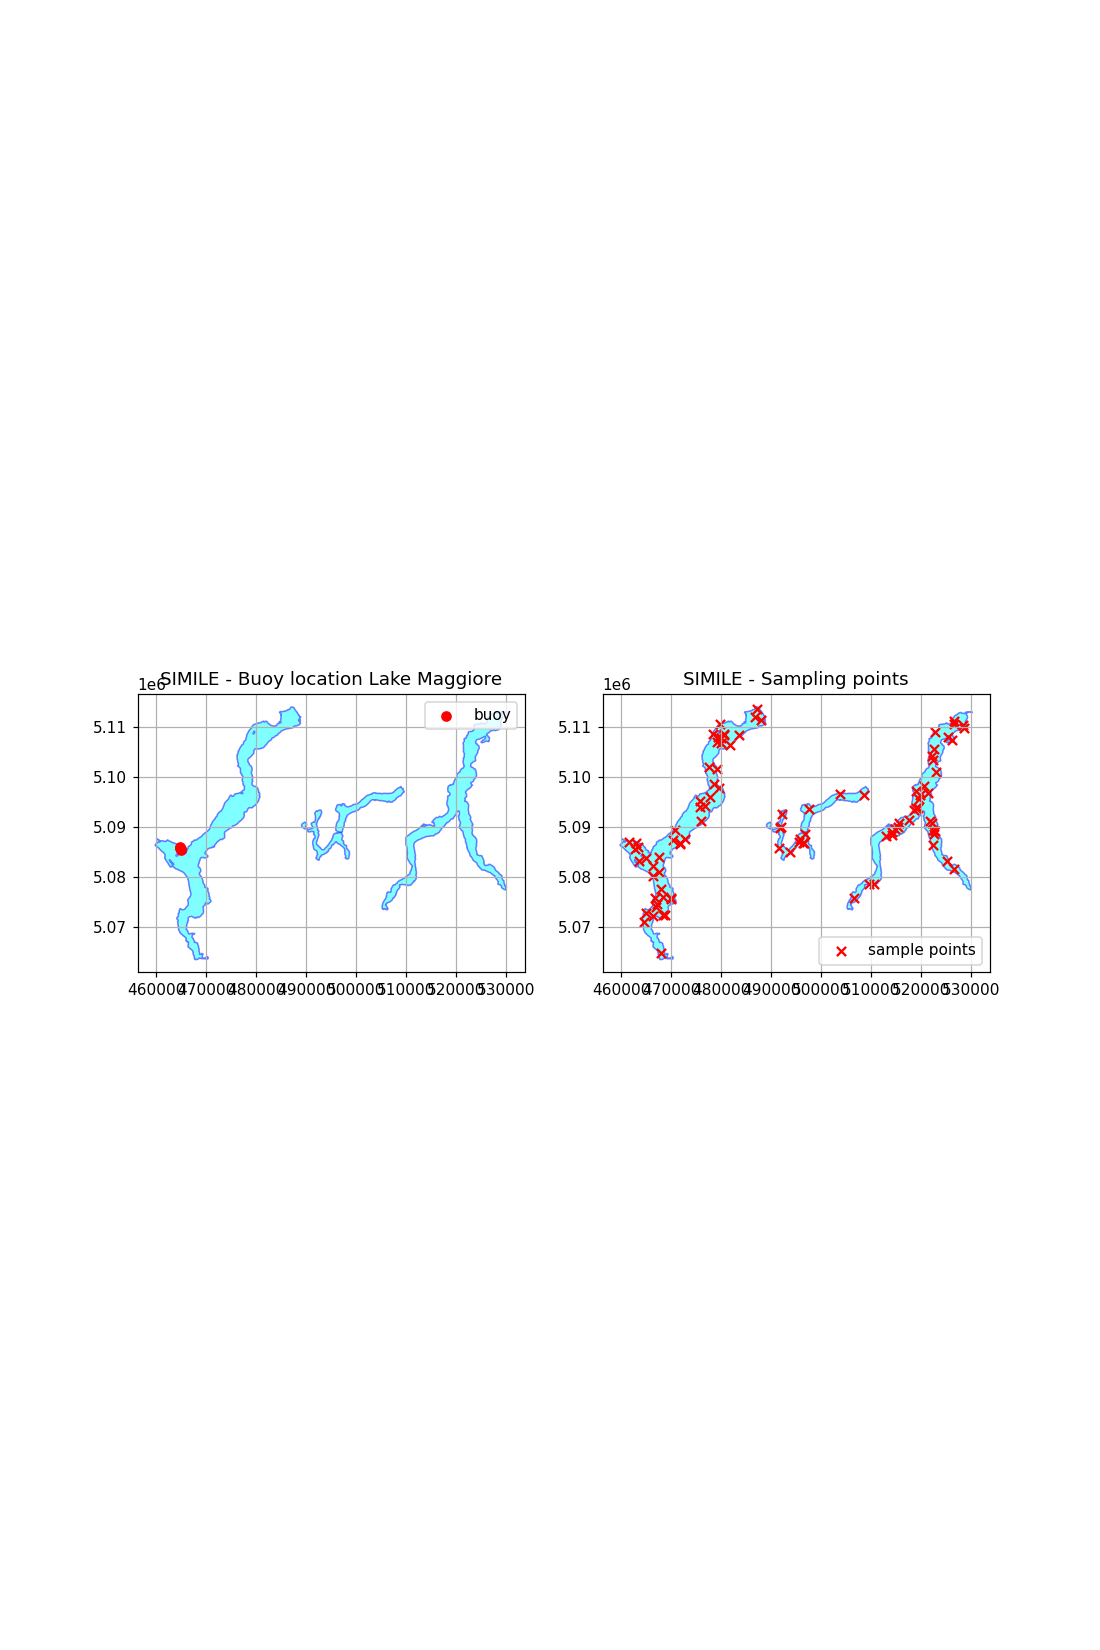

In [60]:
# Data Visualization of the lakes and buoy

# Plot settings
f, axs = plt.subplots(1, 2, figsize=(15,15))

# Sampling buoy
gdf_lakes.plot(ax=axs[0],color='cyan', edgecolor='blue', alpha=0.5)
gdf_buoy.plot(ax=axs[0], label='buoy', marker='o', color='red')
axs[0].set_title('SIMILE - Buoy location Lake Maggiore')
axs[0].legend()
axs[0].grid()

# Random sampling points
gdf_lakes.plot(ax=axs[1],color='cyan', edgecolor='blue', alpha=0.5)
gdf_sample.plot(ax=axs[1], label='sample points', marker ='x', color='red')
axs[1].set_title('SIMILE - Sampling points')
axs[1].legend()
axs[1].grid()

## 2. WQP Map example

Read a WQP map and take advantage of the wqp library functions

In [6]:
#Import the sample dataset
src = wqp.wqp('./in\\S3A_CHL_IT_20200102T094306_L1.tif')
src.readWQP()

Use the attributes and methods for the [rasterio](https://rasterio.readthedocs.io/en/latest/) objects.

In [7]:
src.image.crs

CRS.from_epsg(32632)

In [8]:
src.image.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 236, 'height': 169, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(300.0, 0.0, 459734.0911791796,
       0.0, -300.0, 5114064.250351359), 'tiled': False, 'interleave': 'band'}

In [9]:
# Data visualization of sample WQP
f, axs = plt.subplots(1, 2, figsize=(15,6))

#PLot WQP
axs[0].imshow(src.image.read(1), cmap='viridis')
axs[0].grid()
axs[0].set_title('S3A_CHL_IT_20200102T094306_L1')

#Histogram of values for the bands in the WQP map (single-band)
axs[1] = show_hist(
    src.image, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram", label='CHL')

<IPython.core.display.Javascript object>

Compute the descriptive statistics using the [rasterstats](https://pythonhosted.org/rasterstats/) library. Update the wqp object computing the statistics using reference polygon features within the image.

### 2.1. Descriptive statistics - polygons

In [10]:
src.computeStatistics(gdf_lakes, 'Nome',"count min mean max median std  percentile_25 percentile_50 percentile_75",0)

Present the contents for the example raster layer

In [11]:
src.__dict__

{'path': './in\\S3A_CHL_IT_20200102T094306_L1.tif',
 'name': 'S3A_CHL_IT_20200102T094306_L1',
 'sensor': 'S3A',
 'typology': 'CHL',
 'crs': 'IT',
 'date': datetime.datetime(2020, 1, 2, 9, 43, 6),
 'image': <open DatasetReader name='./in\S3A_CHL_IT_20200102T094306_L1.tif' mode='r'>,
 'stats': {'Maggiore': {'min': 0.8147814869880676,
   'max': 11.643258094787598,
   'mean': 6.0470227730938415,
   'count': 1705,
   'std': 1.2821317838447261,
   'median': 5.95936918258667,
   'percentile_25': 5.382648944854736,
   'percentile_50': 5.95936918258667,
   'percentile_75': 6.497223854064941},
  'Como': {'min': 1.4740662574768066,
   'max': 12.610143661499023,
   'mean': 5.98890732546706,
   'count': 1017,
   'std': 1.5203794679994693,
   'median': 5.543182849884033,
   'percentile_25': 5.17473030090332,
   'percentile_50': 5.543182849884033,
   'percentile_75': 6.323036193847656},
  'Lugano': {'min': 1.2527921199798584,
   'max': 12.913575172424316,
   'mean': 6.435019127408364,
   'count': 266

### 2.2. Extract sample points

Extract information of the raster dataset using sampling points for the first band of a raster.

In [12]:
gdf_sample.head()

,fid,id,geometry
0,1.0,0,POINT (497652.353 5093506.819)
1,2.0,1,POINT (522545.439 5088579.415)
2,3.0,2,POINT (467520.010 5080956.243)
3,4.0,3,POINT (467932.633 5064720.093)
4,5.0,4,POINT (491544.431 5085740.736)


In [13]:
src.extractSamplePoints(gdf_sample[0:5])

In [14]:
src.samplePoint

,x,y,row,col,CHL
0,497652.353120,5.093507e+06,68,126,6.332101
1,522545.438963,5.088579e+06,84,209,4.924937
2,467520.010459,5.080956e+06,110,25,5.147575
3,467932.633429,5.064720e+06,164,27,10.166382
4,491544.431452,5.085741e+06,94,106,NaN


### 2.3. Create a new dataset

In [15]:
t = src.image.read(1)
t[t<=0] = np.nan

In [16]:
src.writeWQP(os.path.join(cwd['out'],'nanImages'),t)

### 2.4. Export statistics

Create, or update, a dataset containing the information about the statistics of the processed wqp maps.

In [17]:
src.stats

{'Maggiore': {'min': 0.8147814869880676,
  'max': 11.643258094787598,
  'mean': 6.0470227730938415,
  'count': 1705,
  'std': 1.2821317838447261,
  'median': 5.95936918258667,
  'percentile_25': 5.382648944854736,
  'percentile_50': 5.95936918258667,
  'percentile_75': 6.497223854064941},
 'Como': {'min': 1.4740662574768066,
  'max': 12.610143661499023,
  'mean': 5.98890732546706,
  'count': 1017,
  'std': 1.5203794679994693,
  'median': 5.543182849884033,
  'percentile_25': 5.17473030090332,
  'percentile_50': 5.543182849884033,
  'percentile_75': 6.323036193847656},
 'Lugano': {'min': 1.2527921199798584,
  'max': 12.913575172424316,
  'mean': 6.435019127408364,
  'count': 266,
  'std': 2.290654442793124,
  'median': 6.254514694213867,
  'percentile_25': 5.474711298942566,
  'percentile_50': 6.254514932632446,
  'percentile_75': 7.099329352378845}}

In [18]:
# New dictionary for the dataset to become a DataFrame
df_temp = pd.DataFrame(src.stats)
df_temp.head()

,Maggiore,Como,Lugano
min,0.814781,1.474066,1.252792
max,11.643258,12.610144,12.913575
mean,6.047023,5.988907,6.435019
count,1705.000000,1017.000000,266.000000
std,1.282132,1.520379,2.290654


In [19]:
df = wqp.wqp.exportWQPFormatEstimates(src)

In [20]:
df

,name,path,sensor,typology,crs,date,min_Maggiore,max_Maggiore,mean_Maggiore,count_Maggiore,...,percentile_75_Como,min_Lugano,max_Lugano,mean_Lugano,count_Lugano,std_Lugano,median_Lugano,percentile_25_Lugano,percentile_50_Lugano,percentile_75_Lugano
0,S3A_CHL_IT_20200102T094306_L1,./in\S3A_CHL_IT_20200102T094306_L1.tif,S3A,CHL,IT,2020-01-02 09:43:06,0.814781,11.643258,6.047023,1705,...,6.323036,1.252792,12.913575,6.435019,266,2.290654,6.254515,5.474711,6.254515,7.099329


In [21]:
# Export the statistics result to a file (append data if existing)
out_file = os.path.join(cwd['out'],'lakesStats','lakesStats.csv')
if os.path.exists(out_file):
    df.to_csv(os.path.join(cwd['out'],'lakesStats','lakesStats.csv'),mode='a', header=False)
else:
    df.to_csv(os.path.join(cwd['out'],'lakesStats','lakesStats.csv')) 

### 2.6. Outlier Rejection Methods

The wqp libray allows to apply the outlier rejection methods within specified features. Next we will extract the cropped rasters for the analysis.

In [22]:
p = os.path.join(cwd['vector'],'simile_laghi','simile_laghi.shp')
src.cropRasterByFeatures(p, 'Nome')

A dictionary will be generated with the correponding subset and transform for the corresponding bounding feature applied

In [23]:
src.crops

{'Maggiore': {'crop': array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
  'transform': Affine(300.0, 0.0, 459734.0911791796,
         0.0, -300.0, 5114064.250351359)},
 'Como': {'crop': array([[[ 0.,  0.,  0., ..., nan,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          ...,
          [ 0., nan, nan, ...,  0.,  0.,  0.],
          [ 0., nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]]], dtype=float32),
  'transform': Affine(300.0, 0.0, 505034.0911791796,
         0.0, -300.0, 5113164.250351359)},
 'Lugano': {'crop': array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ..., nan,  0.,  0.],
          [ 0.,  0.,  0., ..., nan, nan,  0.],
          ...,
    

Once that the subsets are available, is is possible to apply the independent outlier rejection methods of interest

[IQR](https://it.wikipedia.org/wiki/Scarto_interquartile) (Inter Quantile Range method)

<div style="display:inline-flex">
    <div style="width:50%">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1024px-Boxplot_vs_PDF.svg.png">
    </div>
    <div>
        <p>
            Here is possible to find the implementation for the IQR method for outlier detection and rejection.
        </p>
    </div>
</div>

In [24]:
src.outlierRejectionIQR('.',minLower=0)

{'Maggiore': {'IQR': 1.114574909210205,
  'lowerBound': 3.7107865810394287,
  'upperBound': 8.169086217880249,
  'countLower': 45,
  'countUpper': 97,
  'countTotal': 10310.174,
  'percValid': 0.89557946,
  'percOutliers': 0.10442054271697998,
  'raster': <open DatasetWriter name='/vsimem/7b4af1d8-80df-4ca3-963d-fd04e2195526/7b4af1d8-80df-4ca3-963d-fd04e2195526.tif' mode='w+'>,
  'outliers': <open DatasetWriter name='/vsimem/07f0eead-0575-4a31-965e-4013e63e849d/07f0eead-0575-4a31-965e-4013e63e849d.tif' mode='w+'>},
 'Como': {'IQR': 1.148305892944336,
  'lowerBound': 3.4522714614868164,
  'upperBound': 8.04549503326416,
  'countLower': 18,
  'countUpper': 92,
  'countTotal': 6090.7188,
  'percValid': 0.84170675,
  'percOutliers': 0.1582932472229004,
  'raster': <open DatasetWriter name='/vsimem/9cdbc35b-e571-4086-9748-968859d25382/9cdbc35b-e571-4086-9748-968859d25382.tif' mode='w+'>,
  'outliers': <open DatasetWriter name='/vsimem/79da74c7-5cc9-4d74-bdfd-03299abc457d/79da74c7-5cc9-4d74-

Two Sigma

In [25]:
src.crops

{'Maggiore': {'crop': array([[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32),
  'transform': Affine(300.0, 0.0, 459734.0911791796,
         0.0, -300.0, 5114064.250351359)},
 'Como': {'crop': array([[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32),
  'transform': Affine(300.0, 0.0, 505034.0911791796,
         0.0, -300.0, 5113164.250351359)},
 'Lugano': {'crop': array([[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ...,

Three Sigma

In [26]:
a = np.empty((10,10,))

In [27]:
a[:] = np.nan

In [28]:
np.nansum(a<0)

0

## 3. Image Coregistration tests

The image corregistration is executed using [GeFolki](https://github.com/aplyer/gefolki.git).

Sample images cropped for corregistration

### 3.1. Sample datasets for the coregistration

Master band - S3A_IT_20220201T091325_L1_B18



<IPython.core.display.Javascript object>


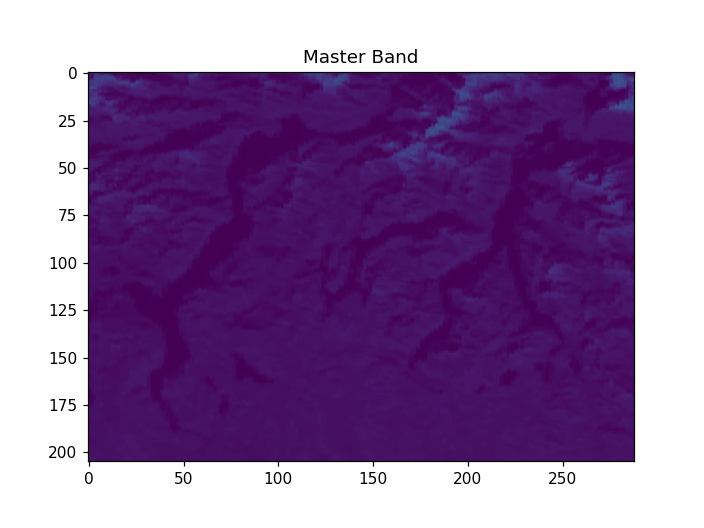

Slave band - S3A_IT_20220203T100203_L1_B18



<IPython.core.display.Javascript object>


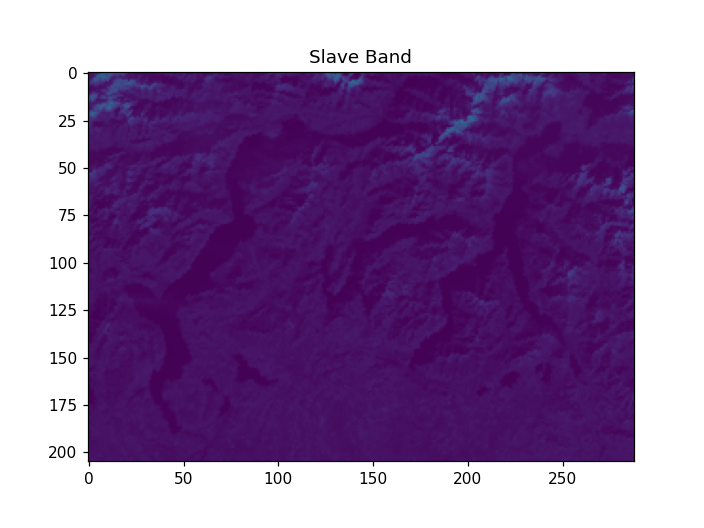

Text(0.5, 1.0, 'Slave Band')

In [46]:
import numpy as np
from skimage.io import imread
import pylab as pl

print("Master band - S3A_IT_20220201T091325_L1_B18\n")
master = imread(os.path.join(cwd['in'],'imageCorregistration\S3A_IT_20220201T091325_L1\cropped','S3A_IT_20220201T091325_L1_B18.tif'))
pl.figure()
pl.imshow(master,vmin=0,vmax=700,cmap='viridis')
pl.title('Master Band')

  
print("Slave band - S3A_IT_20220203T100203_L1_B18\n")
slave = imread(os.path.join(cwd['in'],'imageCorregistration\S3A_IT_20220203T100203_L1\cropped','S3A_IT_20220203T100203_L1_B18.tif'))
pl.figure()
pl.imshow(slave,vmin=0,vmax=500,cmap='viridis')
pl.title('Slave Band')

### 3.2. Flow Computation

In [47]:
import sys
sys.path.append('./src/python/gefolki/python')
from algorithm import EFolki

In [48]:
#Indexing due to different image size. To be fixed
mask = master>0
print(master.shape)
print(mask.shape)
master = master.astype(np.float32)
slave = slave.astype(np.float32)


master=master*mask
slave=slave*mask

(205, 288)
(205, 288)


In [49]:
u, v = EFolki(master, slave, iteration=4, radius=[16,8], rank=4, levels=5)

<IPython.core.display.Javascript object>


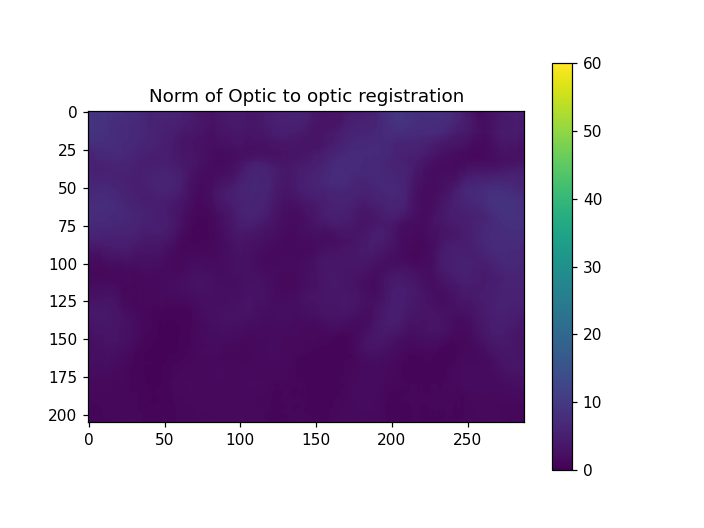

In [50]:
N = np.sqrt(u**2+v**2)
pl.figure()
pl.imshow(N,vmin=0,vmax=60)
pl.title('Norm of Optic to optic registration')
pl.colorbar()

### 3.3. Resampling and final result visualization

Apply flow computation to the coregistered image

In [51]:
from tools import wrapData

In [52]:
slaveRecalee = wrapData(slave, u, v)

Coregistered image

<IPython.core.display.Javascript object>


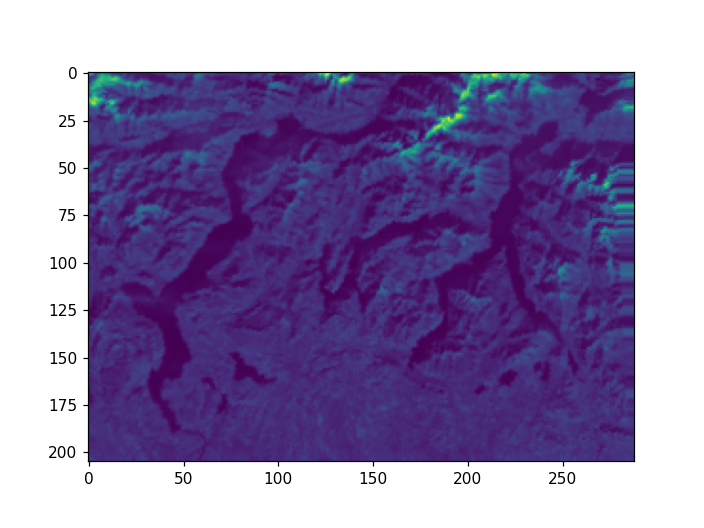

In [53]:
pl.figure()
pl.imshow(slaveRecalee)

Comparison of the results before and after coregistration

<IPython.core.display.Javascript object>


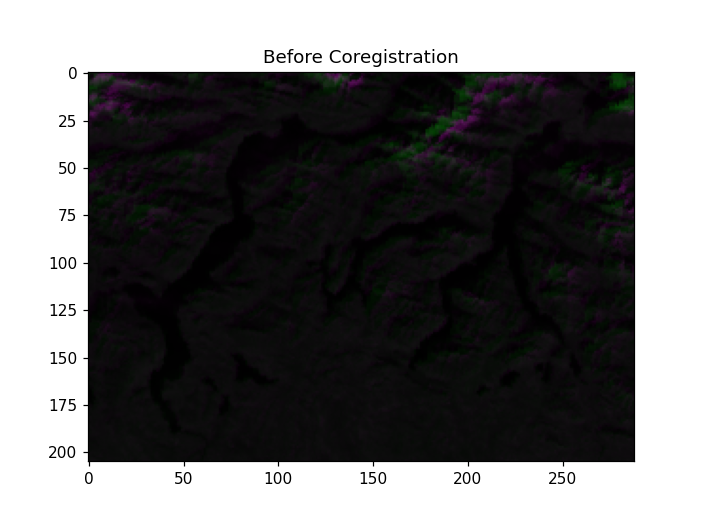

<IPython.core.display.Javascript object>


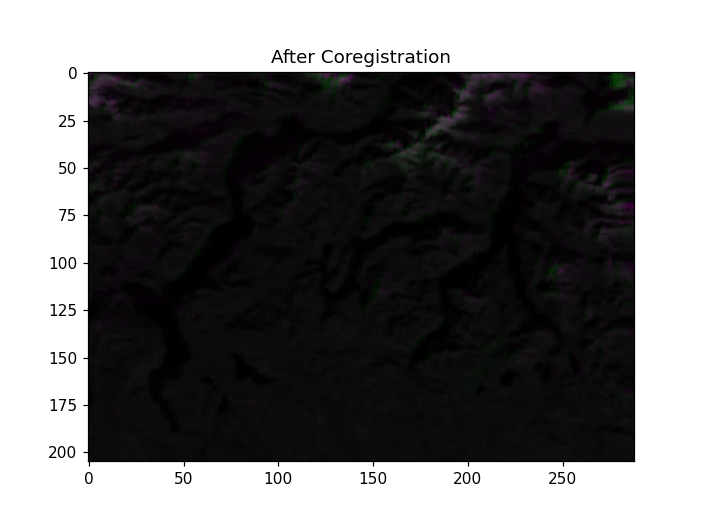

Text(0.5, 1.0, 'After Coregistration')

In [54]:
slaveAff = slave*mask
masterAff = master*mask

C = np.dstack((slave/500, master/700, slave/500))
pl.figure()
pl.imshow(C)
pl.title('Before Coregistration')

slaveRaff = slaveRecalee
D = np.dstack((slaveRaff/500, master/700, slaveRaff/500))
pl.figure()
pl.imshow(D)
pl.title('After Coregistration')

### 3.4. Apply flow computation to WQP map

Import the WQP map to apply the transofrmation

In [55]:
#Import the sample dataset
src = wqp.wqp('in\imageCorregistration\S3A_IT_20220203T100203_L1\wqp\S3A_CHL_IT_20220203T100203_L1.tif')
src.readWQP()

<IPython.core.display.Javascript object>


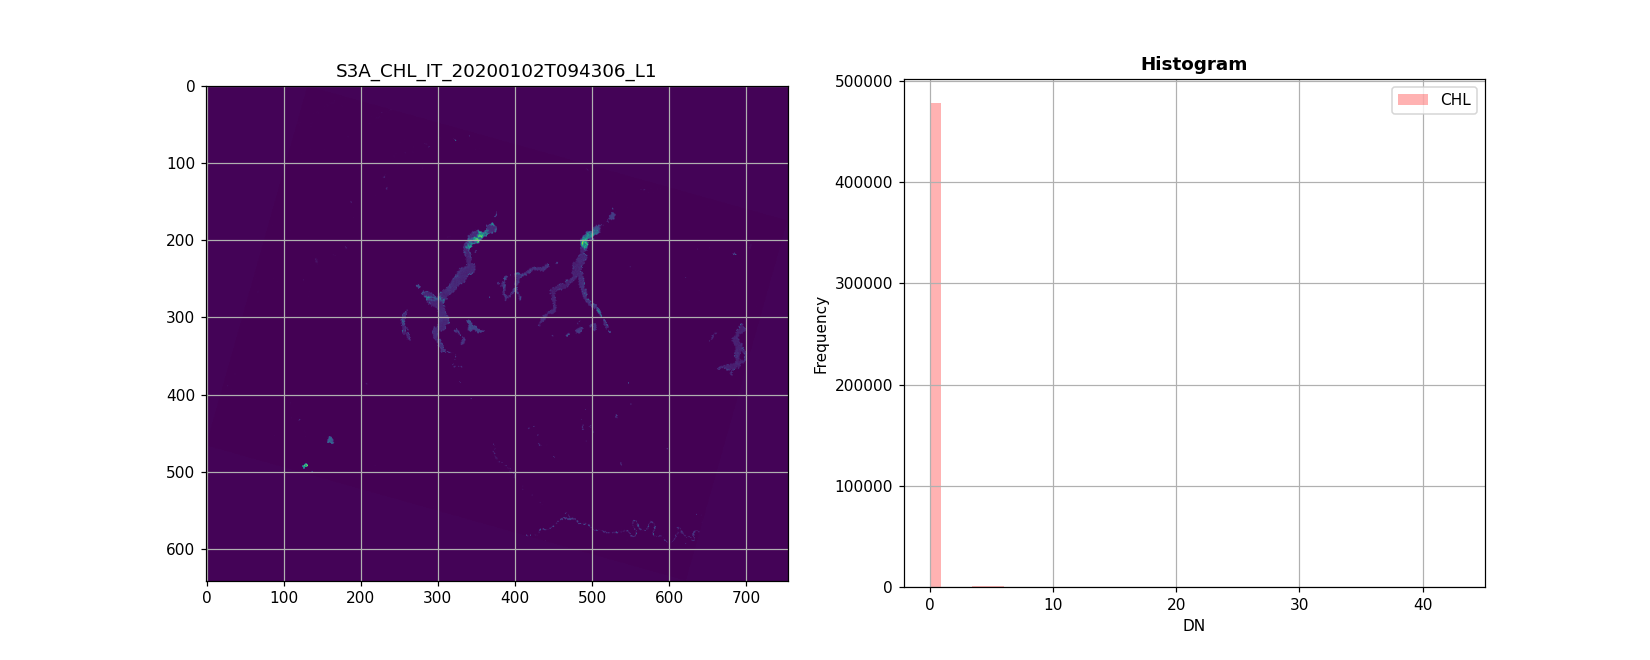

In [56]:
# Data visualization of sample WQP
f, axs = plt.subplots(1, 2, figsize=(15,6))

#PLot WQP
axs[0].imshow(src.image.read(1), cmap='viridis')
axs[0].grid()
axs[0].set_title('S3A_CHL_IT_20200102T094306_L1')

#Histogram of values for the bands in the WQP map (single-band)
axs[1] = show_hist(
    src.image, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram", label='CHL')

In [57]:
wqp_map = imread(os.path.join(cwd['in'],'imageCorregistration\S3A_IT_20220203T100203_L1','slave.tif'))
QBrecalee = wrapData(wqp_map, u, v)

In [58]:
#Import the sample dataset master
src_master = wqp.wqp('in\imageCorregistration\S3A_IT_20220201T091325_L1\wqp\S3A_CHL_IT_20220201T091325_L1.tif')
src_master.readWQP()
# Save the 
src_master.writeWQP(os.path.join(cwd['out'],'corr'),QBrecalee)

<p class="warning"><strong>Warning:</strong> Once finished working with an image remember to close the product</p>

In [ ]:
# src.closeWQP()
# del src